# Predicting prices for second hand cars

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Research Goal

Predicting prices for second hand used cars.

## Data retrieval

We begin by retrieving our car dataset which is found in a csv file

In [7]:
df = pd.read_csv('./second_hand_car.csv')
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


## Data Preprocessing and Cleaning

We need to clean our dataset. The id of the vehicle is of no importance to determining the car price, so we use our intuition and remove it.

In [10]:
df.drop('v.id', axis='columns', inplace=True)
df.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5


We could have as well set 'v.id' as our index i.e. 
```python 
df.set_index('v.id', inplace=True)
```

## Exploratory Data Analysis (EDA)

We need to explore our dataset more by going through an EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   on road old    1000 non-null   int64  
 1   on road now    1000 non-null   int64  
 2   years          1000 non-null   int64  
 3   km             1000 non-null   int64  
 4   rating         1000 non-null   int64  
 5   condition      1000 non-null   int64  
 6   economy        1000 non-null   int64  
 7   top speed      1000 non-null   int64  
 8   hp             1000 non-null   int64  
 9   torque         1000 non-null   int64  
 10  current price  1000 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


In [15]:
df.describe() # Generate descriptive statistics of our dataset

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [16]:
df[df.duplicated()] # Check for duplicates

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price


Let's visualize how each feature plots against our current price

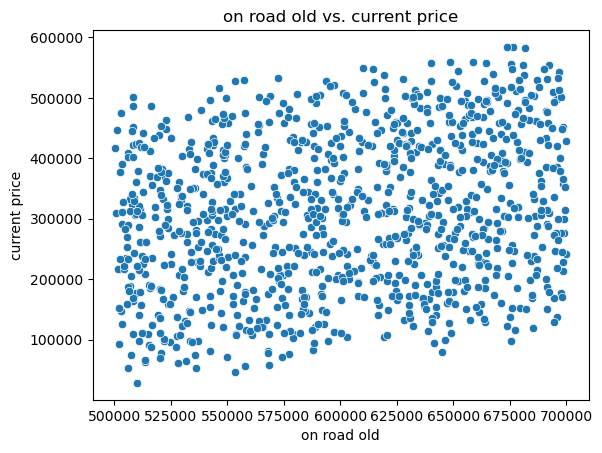

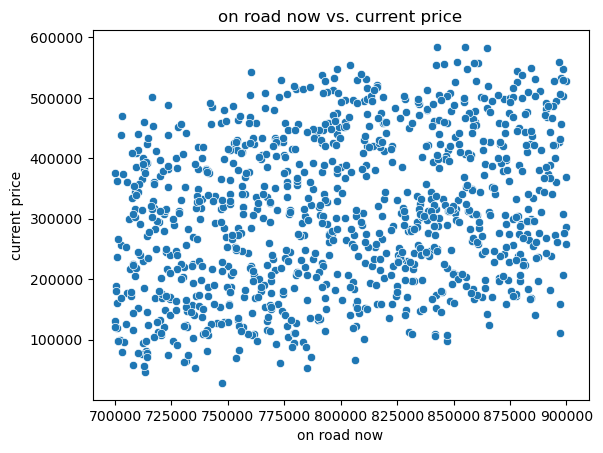

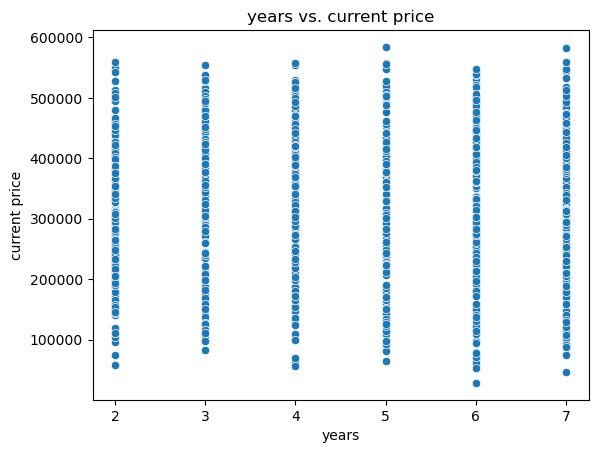

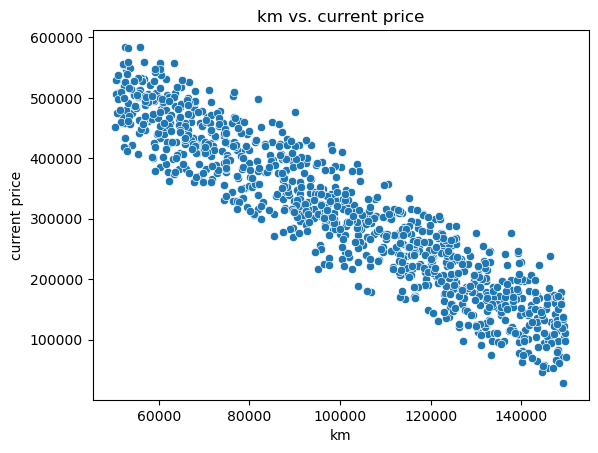

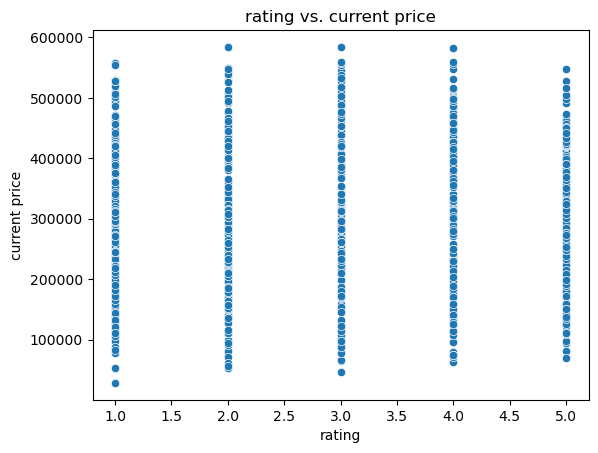

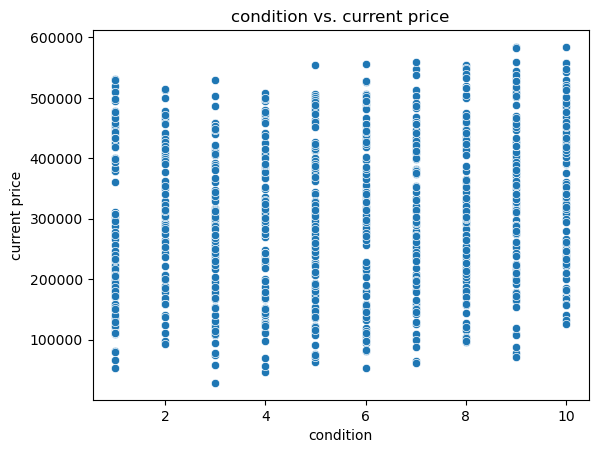

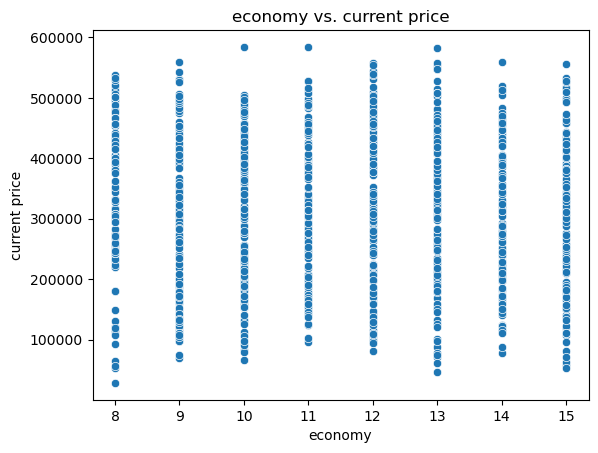

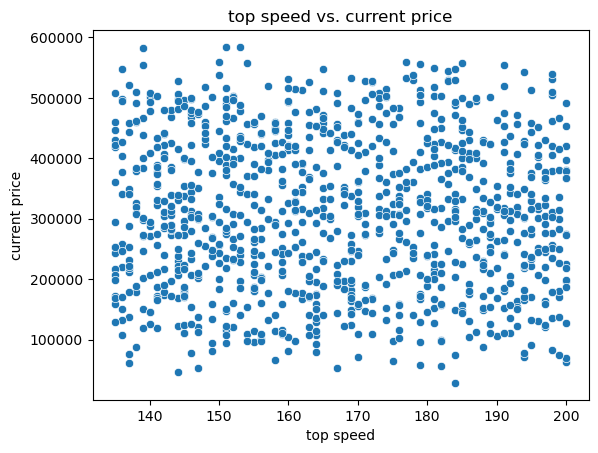

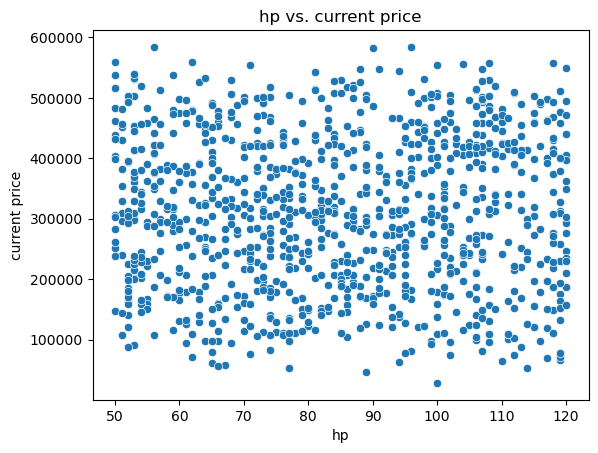

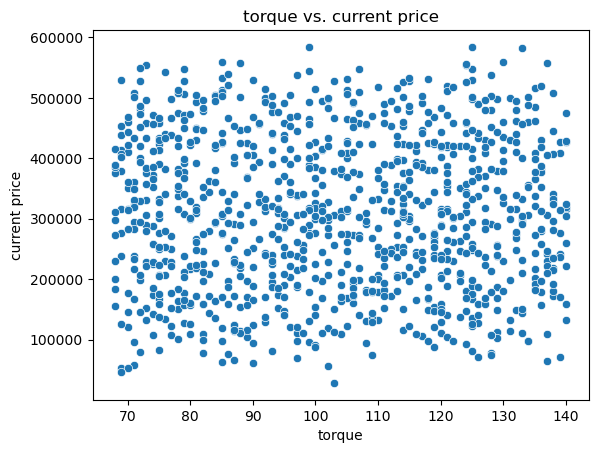

In [18]:
for feature in df.columns[:-1]:
    sns.scatterplot(x=df[feature], y=df['current price'])
    plt.title(f'{feature} vs. current price')
    plt.xlabel(feature)
    plt.ylabel('current price')
    plt.show()

Let's try to see how correlated the features are with the dependent variable

In [20]:
corr_matrix = df.corr()
corr_matrix

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
on road old,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238
torque,0.008950,0.017955,0.028859,0.013566,0.004408,0.047805,0.041632,-0.019697,-0.013817,1.000000,-0.002290


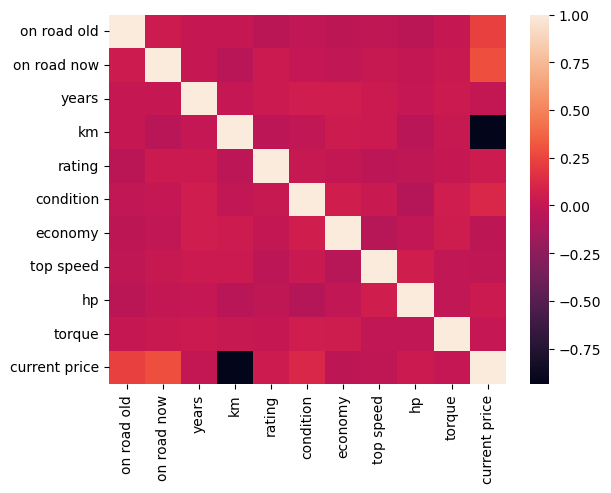

In [21]:
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)
plt.show()
plt.close()

We atleast have some correlation among the independent as well as the dependent variables.
Although we have some pretty low correlations, we still proceed with our dataset.

## Modeling

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

We begin by separating our dataset into dependent and independent variables, y and X respectively.

In [26]:
y = df['current price']
y[0:10]

0    351318.0
1    285001.5
2    215386.0
3    244295.5
4    531114.5
5    177933.5
6    410877.0
7    467471.5
8    462397.5
9    197266.0
Name: current price, dtype: float64

In [27]:
X = df.drop('current price', axis='columns')
X.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,535651,798186,3,78945,1,2,14,177,73,123
1,591911,861056,6,117220,5,9,9,148,74,95
2,686990,770762,2,132538,2,8,15,181,53,97
3,573999,722381,4,101065,4,3,11,197,54,116
4,691388,811335,6,61559,3,9,12,160,53,105


We split our dataset into training and test datasets

In [29]:
# Train 75% and Test 25% of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [30]:
reg_model = LinearRegression() 

In [31]:
reg_model.fit(X_train, y_train) # Train our model

LinearRegression()

In [32]:
y_predicted = reg_model.predict(X_test) # Predict our test data
y_predicted[0:10]

array([298813.53119553, 382271.47713766, 112124.81352996, 182071.48331735,
       181814.23008568, 276159.0185351 , 319579.32814963, 315832.73301423,
       193080.77444769, 356720.21605368])

## Model evaluation and Validation

In [74]:
reg_scores = reg_model.score(X_test, y_test) # Score our model
reg_scores

0.9954052409184017

In [35]:
kf = KFold(shuffle=True, n_splits=5) # We want to apply shuffling, so we use K-Fold.

In [36]:
scores = cross_val_score(reg_model, X, y, cv=kf) 
scores

array([0.99536793, 0.99442419, 0.99537122, 0.99498744, 0.9954209 ])

In [37]:
scores.mean()

0.9951143330885422

In [38]:
# Perform cross-validation using negative MSE (lower MSE is better)
mse_scores = cross_val_score(reg_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Since the result is negative, multiply by -1 to get positive MSE values
mse_scores = -mse_scores
mse_scores

array([82716755.48669367, 74662834.83611041, 79278622.5970734 ,
       77779906.54748839, 73234141.00595902])

In [39]:
mse_scores.mean()

77534452.09466498

We can see that our model's performance for MSE is poor. If we compare the mean of MSE, it is war off with our minimum and maximum 
values from our dataset EDA. This could suggest outliers.

In [41]:
mae_scores = cross_val_score(reg_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores
mae_scores

array([7459.85281707, 7417.94131046, 7394.77565564, 7269.88567882,
       7226.771733  ])

In [42]:
mae_scores.mean()

7353.845438996452

MAE produces better results which shows majority of the predicted values are close to actual values.

## Results

Let's visualize how well our model peforms by comparing the true and predicted prices

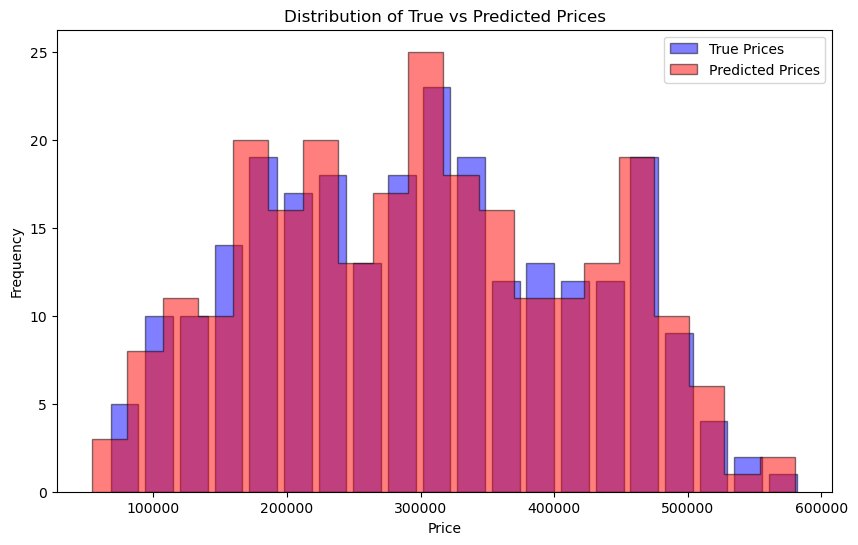

In [46]:
# Number of bins and bin width
n_bins = 20
bin_width = (max(np.max(y_test), np.max(y_predicted)) - min(np.min(y_test), np.min(y_predicted))) / n_bins

# Plotting side-by-side histograms for true vs predicted prices
plt.figure(figsize=(10, 6))

# Plotting the true prices histogram
plt.hist(y_test, bins=n_bins, alpha=0.5, label='True Prices', color='blue', edgecolor='black', align='mid', rwidth=0.8)

# Plotting the predicted prices histogram, with a small offset to avoid overlap
plt.hist(y_predicted, bins=n_bins, alpha=0.5, label='Predicted Prices', color='red', edgecolor='black', align='mid', rwidth=0.8, histtype='stepfilled')

# Labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of True vs Predicted Prices')

plt.show()
plt.close()